# WeatherPy
Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
city = citipy

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [3]:
print(cities)

['avarua', 'vila do maio', 'taolanaro', 'wukari', 'belushya guba', 'norman wells', 'ushuaia', 'pangnirtung', 'saleaula', 'dikson', 'bundaberg', 'vinnytsya', 'saskylakh', 'souillac', 'thompson', 'coahuayana', 'albany', 'atuona', 'grand river south east', 'longyearbyen', 'kapaa', 'jamestown', 'milingimbi', 'grand gaube', 'amderma', 'svetlyy', 'najran', 'rikitea', 'tsihombe', 'saint-francois', 'bethel', 'attawapiskat', 'san quintin', 'cape town', 'mungaa', 'dingle', 'hobart', 'butaritari', 'lanzhou', 'marawi', 'punta arenas', 'klaksvik', 'tromso', 'awbari', 'busselton', 'quetzaltepec', 'mahebourg', 'bo rai', 'grindavik', 'lulea', 'pevek', 'cayhagan', 'kashi', 'pitimbu', 'soyo', 'college', 'muncar', 'moron', 'aklavik', 'san patricio', 'tuatapere', 'tucupita', 'illoqqortoormiut', 'iqaluit', 'bad worishofen', 'jumla', 'bluff', 'esperance', 'adrar', 'guerrero negro', 'mataura', 'yellowknife', 'nara', 'sabzevar', 'hermanus', 'zunyi', 'soe', 'maua', 'barentsburg', 'kletskaya', 'kalaikunda', 'ki

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Data list of Cities
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
date = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter =0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing record" + str(record_counter) +"of Set" + str(setcount) +"|" +city)
    try: 
        weather_response = requests.get(f"{url}{city}&appid={weather_api_key}").json()
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City Not Found, Pass...:" + city)

        
print(len(weather_response))      


processing record1of Set1|avarua
processing record2of Set1|vila do maio
processing record3of Set1|taolanaro
City Not Found, Pass...:taolanaro
processing record4of Set1|wukari
processing record5of Set1|belushya guba
City Not Found, Pass...:belushya guba
processing record6of Set1|norman wells
processing record7of Set1|ushuaia
processing record8of Set1|pangnirtung
processing record9of Set1|saleaula
City Not Found, Pass...:saleaula
processing record10of Set1|dikson
processing record11of Set1|bundaberg
processing record12of Set1|vinnytsya
processing record13of Set1|saskylakh
processing record14of Set1|souillac
processing record15of Set1|thompson
processing record16of Set1|coahuayana
processing record17of Set1|albany
processing record18of Set1|atuona
processing record19of Set1|grand river south east
City Not Found, Pass...:grand river south east
processing record20of Set1|longyearbyen
processing record21of Set1|kapaa
processing record22of Set1|jamestown
processing record23of Set1|milingimbi


processing record8of Set5|mitsamiouli
processing record9of Set5|newcastle
processing record10of Set5|manta
processing record11of Set5|porto santo
processing record12of Set5|kidal
processing record13of Set5|karacakoy
processing record14of Set5|nyahururu
processing record15of Set5|lolua
City Not Found, Pass...:lolua
processing record16of Set5|comodoro rivadavia
processing record17of Set5|bolungarvik
City Not Found, Pass...:bolungarvik
processing record18of Set5|maceio
processing record19of Set5|katsuura
processing record20of Set5|barawe
City Not Found, Pass...:barawe
processing record21of Set5|vanavara
processing record22of Set5|east london
processing record23of Set5|sao filipe
processing record24of Set5|brae
processing record25of Set5|labuhan
processing record26of Set5|silver city
processing record27of Set5|turayf
processing record28of Set5|kahului
processing record29of Set5|belaya gora
processing record30of Set5|lerwick
processing record31of Set5|uribia
processing record32of Set5|new n

processing record14of Set9|alice springs
processing record15of Set9|krasnogvardeyskiy
processing record16of Set9|yirol
City Not Found, Pass...:yirol
processing record17of Set9|mulege
processing record18of Set9|dunedin
processing record19of Set9|healdsburg
processing record20of Set9|haines junction
processing record21of Set9|margate
processing record22of Set9|madanapalle
processing record23of Set9|labutta
City Not Found, Pass...:labutta
processing record24of Set9|hami
processing record25of Set9|nizhniy tsasuchey
processing record26of Set9|babanusah
City Not Found, Pass...:babanusah
processing record27of Set9|leshukonskoye
processing record28of Set9|richards bay
processing record29of Set9|nyurba
processing record30of Set9|amparafaravola
processing record31of Set9|pisco
processing record32of Set9|komsomolskiy
processing record33of Set9|jaisalmer
processing record34of Set9|turukhansk
processing record35of Set9|kununurra
processing record36of Set9|jiddah
City Not Found, Pass...:jiddah
proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Creating a DataFrame
city_data_df = pd.DataFrame({"City":city_list,
                         "Lat":lat_list,
                         "Lng":lng_list,
                         "Max Temp":max_temp_list,
                         "Humidity":humidity_list,
                         "Cloudiness":cloudiness_list,
                         "Wind Speed":windspeed_list,
                            })

pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()
# city_data_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,-21.2078,-159.7750,299.18,78,40,8.23
1,Vila do Maio,15.1333,-23.2167,295.59,88,86,6.76
2,Wukari,7.8500,9.7833,298.30,80,99,2.61
3,Norman Wells,65.2820,-126.8329,286.17,33,20,5.66
4,Ushuaia,-54.8000,-68.3000,277.96,93,90,0.00


In [6]:
weather_dict = {"City":city_list,
                         "Lat":lat_list,
                         "Lng":lng_list,
                         "Max Temp":max_temp_list,
                         "Humidity":humidity_list,
                         "Cloudiness":cloudiness_list,
                         "Wind Speed":windspeed_list,
}
weather_dict

{'City': ['Avarua',
  'Vila do Maio',
  'Wukari',
  'Norman Wells',
  'Ushuaia',
  'Pangnirtung',
  'Dikson',
  'Bundaberg',
  'Vinnytsia',
  'Saskylakh',
  'Souillac',
  'Thompson',
  'Coahuayana Viejo',
  'Albany',
  'Atuona',
  'Longyearbyen',
  'Kapaa',
  'Jamestown',
  'Grand Gaube',
  'Tsimmerbude',
  'Najrān',
  'Rikitea',
  'Saint-François',
  'Bethel',
  'San Quintín',
  'Cape Town',
  'Mungaa',
  'Dingle',
  'Hobart',
  'Butaritari',
  'Lanzhou',
  'Marawi',
  'Punta Arenas',
  'Klaksvík',
  'Tromsø',
  'Ubari',
  'Busselton',
  'Mahébourg',
  'Bo Rai',
  'Grindavik',
  'Luleå',
  'Pevek',
  'Cayhagan',
  'Kashgar',
  'Pitimbu',
  'Soyo',
  'College',
  'Muncar',
  'Morón',
  'Aklavik',
  'San Patricio',
  'Tuatapere',
  'Tucupita',
  'Iqaluit',
  'Bad Wörishofen',
  'Jumla',
  'Bluff',
  'Esperance',
  'Adrar',
  'Guerrero Negro',
  'Mataura',
  'Yellowknife',
  'Nara',
  'Sabzawār',
  'Hermanus',
  'Zunyi',
  'Soe',
  'Mauá',
  'Kletskaya',
  'Kalaīkunda',
  'Kirakira',
  '

In [7]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,-21.2078,-159.7750,299.18,78,40,8.23
1,Vila do Maio,15.1333,-23.2167,295.59,88,86,6.76
2,Wukari,7.8500,9.7833,298.30,80,99,2.61
3,Norman Wells,65.2820,-126.8329,286.17,33,20,5.66
4,Ushuaia,-54.8000,-68.3000,277.96,93,90,0.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

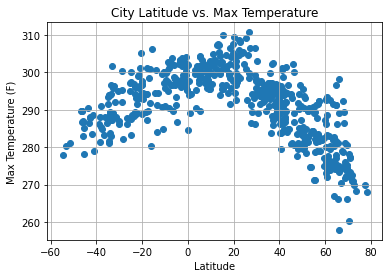

In [8]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('Max_temp.png')

## Latitude vs. Humidity Plot

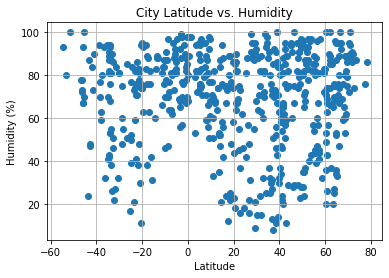

In [9]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png')

## Latitude vs. Cloudiness Plot

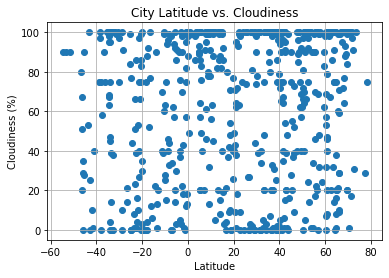

In [10]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_clouds.png')

## Latitude vs. Wind Speed Plot

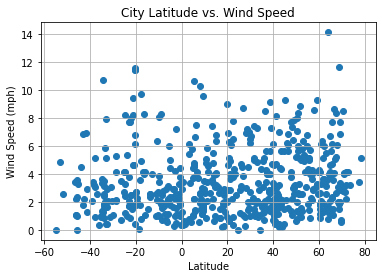

In [11]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_windspd.png')

## Linear Regression

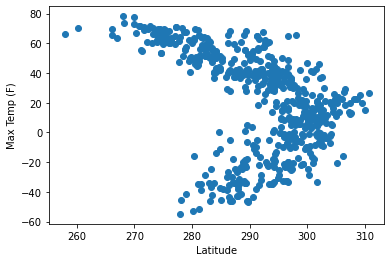

In [12]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Max Temp']
y_values = city_data_df['Lat']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

In [13]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_df['Max Temp'],city_data_df['Lat'])

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       8.151504
1      13.596512
2       9.486214
3      27.883971
4      40.336204
         ...    
553    27.489625
554    19.845380
555     0.977441
556    22.666470
557    19.678541
Name: Max Temp, Length: 558, dtype: float64


In [14]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.52x +461.92


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.17745057324696212


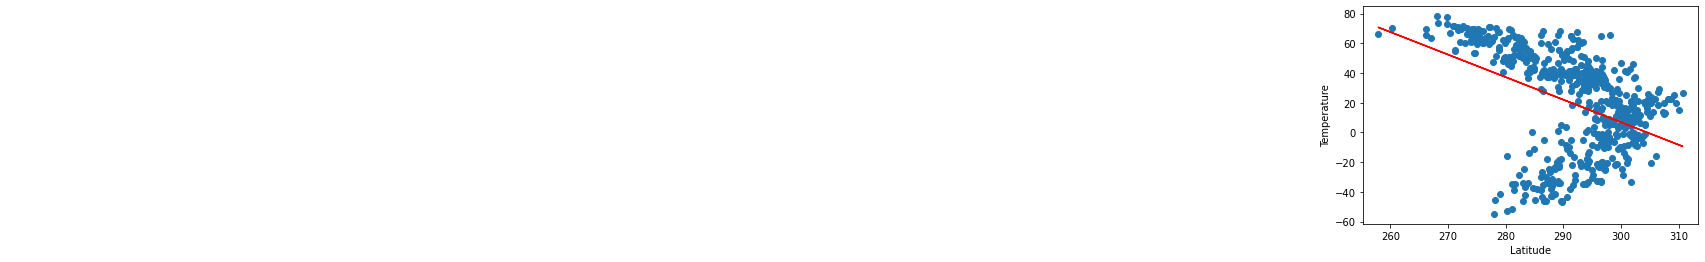

In [15]:
# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression